In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D
from tensorflow.keras.models import Model

In [3]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print("x_train.shape:", x_train.shape)
print("x_train.shape[0]:", x_train.shape[0])
print("x_train.shape[0]/32:", x_train.shape[0]/32)
print("y_train.shape:", y_train.shape)
y_test

x_train.shape: (50000, 32, 32, 3)
x_train.shape[0]: 50000
x_train.shape[0]/32: 1562.5
y_train.shape: (50000,)


array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [3]:
# number of classes
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [4]:
print(x_train[0])
print(x_train[0].shape)

[[[0.23137255 0.24313725 0.24705882]
  [0.16862745 0.18039216 0.17647059]
  [0.19607843 0.18823529 0.16862745]
  ...
  [0.61960784 0.51764706 0.42352941]
  [0.59607843 0.49019608 0.4       ]
  [0.58039216 0.48627451 0.40392157]]

 [[0.0627451  0.07843137 0.07843137]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509804 0.21568627]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117647 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215686 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941176 0.19607843]
  [0.47058824 0.32941176 0.19607843]
  [0.42745098 0.28627451 0.16470588]]

 ...

 [[0.81568627 0.66666667 0.37647059]
  [0.78823529 0.6        0.13333333]
  [0.77647059 0.63137255 0.10196078]
  ...
  [0.62745098 0.52156863 0.2745098 ]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333333 0.07843137]]

 [[0.70588235 0.54509804 0.37647059]
  [0.67843137 0.48235294 0.16470588]


In [7]:
# Build the model using the functional API
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)
model.summary()


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 15, 15, 32)        896       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten_2 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 1152)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              1180

In [8]:
# Compile and fit
# Note: make sure you are using hte GPU for this!
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 23s 454us/sample - loss: 1.5911 - acc: 0.4171 - val_loss: 1.2851 - val_acc: 0.5321
Epoch 2/15
50000/50000 [==============================] - 23s 461us/sample - loss: 1.2894 - acc: 0.5352 - val_loss: 1.1371 - val_acc: 0.5905
Epoch 3/15
50000/50000 [==============================] - 23s 469us/sample - loss: 1.1682 - acc: 0.5807 - val_loss: 1.0522 - val_acc: 0.6260
Epoch 4/15
50000/50000 [==============================] - 24s 473us/sample - loss: 1.0746 - acc: 0.6138 - val_loss: 1.0034 - val_acc: 0.6432
Epoch 5/15
50000/50000 [==============================] - 24s 476us/sample - loss: 1.0093 - acc: 0.6395 - val_loss: 0.9447 - val_acc: 0.6646
Epoch 6/15
50000/50000 [==============================] - 23s 455us/sample - loss: 0.9478 - acc: 0.6617 - val_loss: 0.9249 - val_acc: 0.6670
Epoch 7/15
50000/50000 [==============================] - 23s 466us/sample - loss: 0.8970 - acc: 0.6811 

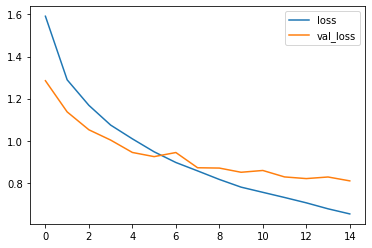

In [9]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

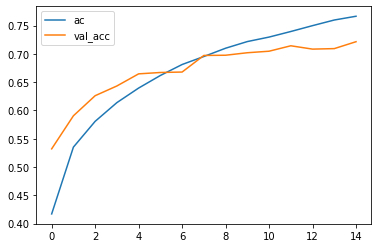

In [11]:
# Plot accuracy per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['acc'], label='ac')
plt.plot(r.history['val_acc'], label='val_acc')
plt.legend()

Consusion matrix, without normalization
[[756  16  48  20  22   6   8  11  74  39]
 [ 21 838   2  13   6   9  12   7  28  64]
 [ 55   4 608  59  94  70  53  38  16   3]
 [ 18  11  63 461  63 256  73  35  14   6]
 [ 27   6  70  49 689  45  36  65  12   1]
 [ 10   2  36 139  61 677  23  37  11   4]
 [  9   6  41  52  51  30 786   9  15   1]
 [ 10   2  28  35  64  61   8 781   6   5]
 [ 51  34   8   8   8  15   2   5 850  19]
 [ 31  84   8  24   6  13  16  17  33 768]]


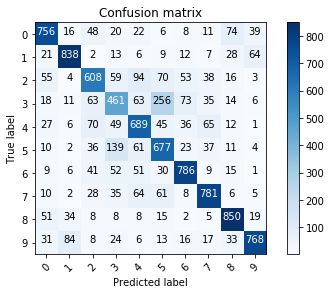

In [12]:
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes, 
                          normalize=False, 
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be appled by setting `normalize=True`.
  """
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("normalized confusion matrix")
  else:
    print('Consusion matrix, without normalization')
  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
  
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [13]:
# Label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

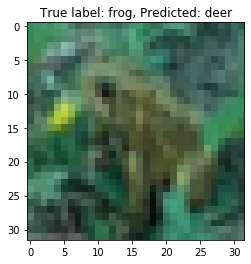

In [14]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s, Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));